# Introduction


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling


In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print('Number of samples:', len(df))

Number of samples: 110527


In [4]:
list(df. columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [5]:
# checking for missing data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data contains 14 features which have no missing data!

Data types of some columns are incorrect and we need to fix them:
    1. No-show : to integer(1: Yes/ 0: No).
    2. Scheduled & Appointment days: to date.
    3. Gender: to category (M: Male, F: Female)    

The columns (['PatientId','AppointmentID']) are not important in our analysis since we are not dependendent on them to attain our results.Thus we will remove them from the anaysis.

In [6]:
df.drop(['PatientId','AppointmentID'],axis=1, inplace=True)

In [7]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age cannot be negative, thus this is an error that we need to correct.

In [8]:
df[df.Age<0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since there is only one negative entry in the data, we need to remove it.

In [9]:
df = df[~(df['Age'] < 1)]

In [10]:
df.shape

(106987, 12)

In [11]:
df.Age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In order to be able to analyse the dependent variable 'No show' we need to connvert the data to binary so that our analysis can be made easier.We therefore replace the No/Yes with 1/0: in order to subject our analysis to a numerical output.We will also change the column 'No-show' to 'Present' because of the confusion created from the earlier name.

In [12]:
df.rename(columns={'No-show': 'Present'}, inplace=True)
df.Present.replace(['No','Yes'], [1,0], inplace =True)
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [13]:
df.Gender = df.Gender.astype('category')
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

Based on our Research questions, I am not breaking down the date periods since am not basing my analysis on the time periods.

In [14]:
df.shape

(106987, 12)

In [15]:
(df.groupby('Gender').size() / df.shape[0]).round(1)

Gender
F    0.7
M    0.3
dtype: float64

There are 2 more times more women than men in the dataset.

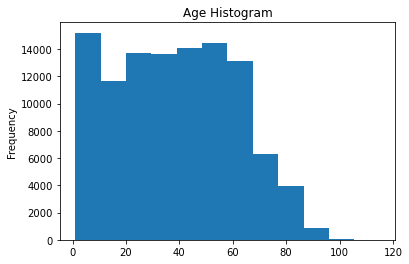

In [16]:
df.Age.plot(kind='hist',bins=12)
plt.title('Age Histogram');

# Research questions

### Q1) Does one receiving sms reminder affect attendance?

In [17]:
def bar_plot(arg1, arg2):
    pd.crosstab(df[arg1], df.Present, normalize='columns').plot(kind='bar', alpha=0.95)
    plt.xlabel(arg1)
    plt.ylabel('Proportion')
    plt.title('arg2')
    plt.margins(y=0.2)
    

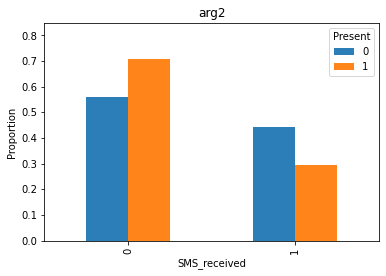

In [18]:
bar_plot('SMS_received', 'Proportion of Attendance Rate by SMS_received')

The rate of attendance of patients who have received the message being reminded of their appointment is subject to change and is different from those who did not show up.In real life perspective the message acts as a reminder that one should be ready to go for the appointment and alocates time for that. In the data the opposite happens, since we cannot understand how one receives a reminder and is not able to show up meaning that other external factors which are not in the analysis are in play.

# Q2) Is Attendance affected by one attaining the Bolsa Familia Scholarship?

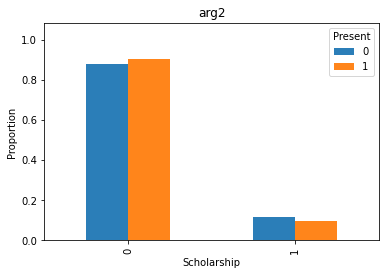

In [19]:
bar_plot('Scholarship', 'Proportion of Attendance Rate by Scholarship')

### Q3) Does Gender affect the rate of showing up?

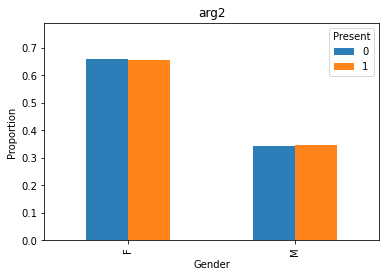

In [20]:
bar_plot('Gender', 'Proportion of Attendance Rate by Gender')
    

### Conclusion